In [55]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [56]:
data=pd.read_csv(r"C:\Users\mohan\Desktop\EXCEL r assignment\Decision tree\Company_Data.csv")

In [57]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [58]:
max(data.Sales)

16.27

In [30]:
data.Sales.mean()

7.496325

In [59]:
data['Sales'] = data['Sales'].replace({0:7.49})
min(data.Sales)

0.16

In [60]:
sales=pd.cut(data.Sales,bins=[0,7.49,16.30],labels=['Low','High'])
sales

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Low' < 'High']

In [61]:
other=data.iloc[:,1:11] 
other_final=pd.get_dummies(other)

In [62]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
 

sales_f= label_encoder.fit_transform(sales)
 
sales_f

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [63]:
y=sales_f
x=other_final.values

In [64]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=4)

In [65]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [66]:
model.get_n_leaves()

9

In [67]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    61
1    59
dtype: int64

In [68]:
pd.crosstab(y_test,preds)

col_0,0,1
row_0,,
0,48,12
1,13,47


In [69]:
np.mean(preds==y_test)

0.7916666666666666

In [70]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        61
           1       0.78      0.80      0.79        59

    accuracy                           0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.79      0.79      0.79       120



{'whiskers': [<matplotlib.lines.Line2D at 0x1db5b5a24f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1db5b5a2d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db5b5ad700>],
 'medians': [<matplotlib.lines.Line2D at 0x1db5b5b2d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db5b5b23a0>],
 'means': []}

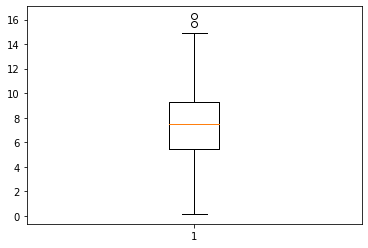

In [71]:
plt.boxplot(data['Sales'])

[Text(146.475, 195.696, 'X[4] <= 89.5\nentropy = 1.0\nsamples = 280\nvalue = [139, 141]'),
 Text(125.55000000000001, 152.208, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(167.4, 152.208, 'X[8] <= 0.5\nentropy = 0.987\nsamples = 249\nvalue = [108, 141]'),
 Text(83.7, 108.72, 'X[5] <= 49.5\nentropy = 0.941\nsamples = 204\nvalue = [73, 131]'),
 Text(41.85, 65.232, 'X[4] <= 126.0\nentropy = 0.997\nsamples = 81\nvalue = [43, 38]'),
 Text(20.925, 21.744, 'entropy = 0.851\nsamples = 47\nvalue = [34, 13]'),
 Text(62.775000000000006, 21.744, 'entropy = 0.834\nsamples = 34\nvalue = [9, 25]'),
 Text(125.55000000000001, 65.232, 'X[9] <= 0.5\nentropy = 0.801\nsamples = 123\nvalue = [30, 93]'),
 Text(104.625, 21.744, 'entropy = 0.406\nsamples = 37\nvalue = [3, 34]'),
 Text(146.475, 21.744, 'entropy = 0.898\nsamples = 86\nvalue = [27, 59]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 43.0\nentropy = 0.764\nsamples = 45\nvalue = [35, 10]'),
 Text(209.25, 65.232, 'X[4] <= 130.5\nentropy = 0.8

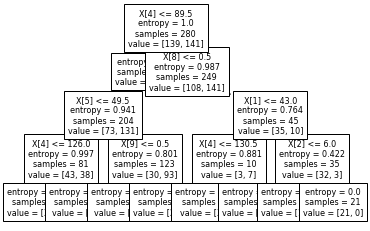

In [72]:
tree.plot_tree(model,fontsize =8)